# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


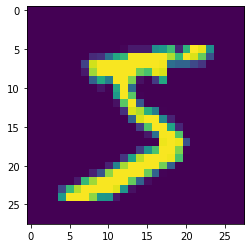

In [24]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [27]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [29]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.layers import Activation,GlobalAveragePooling2D
model = Sequential()

 
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))

# model.add(Dropout(0.2))

#model.add(Convolution2D(10, 1, activation='relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to 

In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
dropout_20 (Dropout)         (None, 8, 8, 32)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.2479 - acc: 0.9192
Epoch 2/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0637 - acc: 0.9803
Epoch 3/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0489 - acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0406 - acc: 0.9873
Epoch 5/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0354 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0309 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0273 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0237 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0224 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 12s 198us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [53]:
print(score)

[0.021404574781720295, 0.9935]


In [0]:
y_pred = model.predict(X_test)

In [55]:
print(y_pred[:9])
print(y_test[:9])

[[4.11749329e-13 5.02997644e-09 1.77711286e-07 1.91254692e-08
  9.49385193e-09 1.90133215e-13 2.10566504e-15 9.99998569e-01
  3.23715144e-09 1.17148704e-06]
 [4.55685923e-12 5.34543032e-09 1.00000000e+00 1.19321705e-11
  1.07940540e-11 1.32542621e-12 3.12432413e-10 1.02235386e-12
  1.76798680e-11 3.99169833e-14]
 [8.43198755e-09 9.99911308e-01 3.17810489e-08 2.76493211e-08
  3.92242282e-06 7.15276201e-06 2.28447084e-06 2.06474033e-05
  5.29381687e-05 1.77426284e-06]
 [9.99882698e-01 2.56682203e-10 5.34158858e-07 1.99221745e-07
  7.00580998e-08 5.77853200e-07 7.27858514e-06 2.68012116e-07
  4.10993061e-06 1.04288723e-04]
 [9.96106149e-12 8.19135160e-09 1.24608128e-08 1.59308078e-09
  9.99949336e-01 1.26965514e-08 2.36694242e-09 1.95220351e-09
  2.77234085e-06 4.79096379e-05]
 [2.31463360e-09 9.99973059e-01 6.10842177e-09 3.77520948e-09
  4.92622803e-06 1.09935661e-06 1.19191576e-07 1.17589361e-05
  8.29330384e-06 7.50903951e-07]
 [1.21267177e-10 4.46109480e-05 1.15131378e-07 1.11074435e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

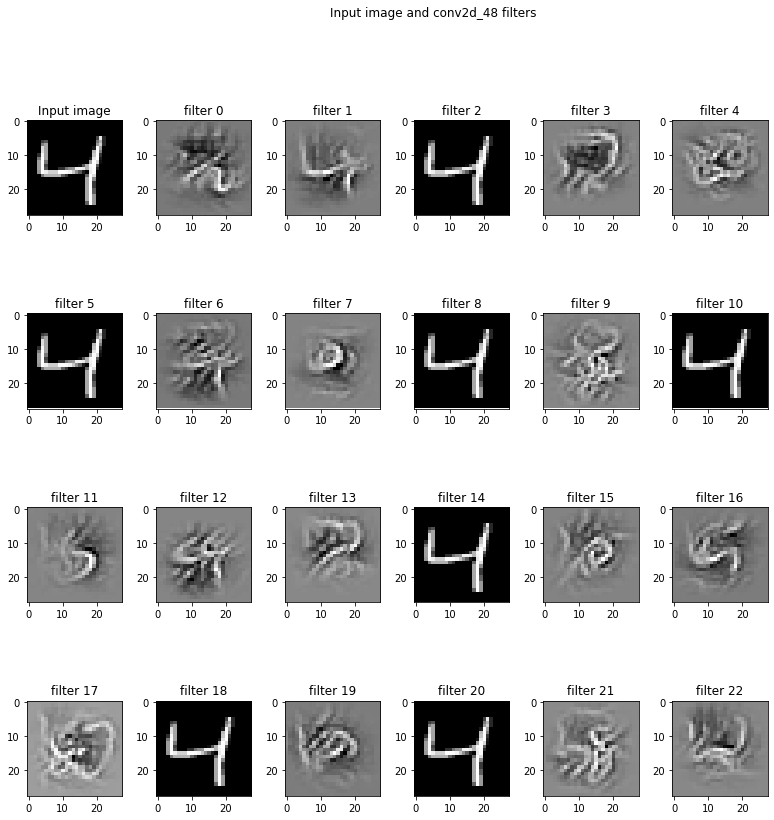

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_48'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()